# Project-1 : Unsupervised Learning

1.EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
%matplotlib inline
car_df = pd.read_csv("cars-dataset.csv")
car_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [2]:
print("\033[94m\033[1m1. Dimension of cars-dataset :\x1b[0m",list(car_df.shape )[0] ,
      " Rows &",list(car_df.shape )[1] ," Columns")
total_rows1 = list(car_df.shape )[0]
print("\033[94m\033[1m2. Column Names:\x1b[0m")
for i,col in enumerate(car_df.columns.tolist(),start=1):
    print (" {}.{} ".format(i,col))
print("\033[94m\033[1m3. There is/are \x1b[0m", car_df[car_df.isnull().isna()].count().sum(),
       "\033[94m\033[1mmissing value(s) or na in the data set.\x1b[0m")
print("\033[94m\033[1m4. Data Info:\x1b[0m")
print("-"*50)
print(car_df.info())

1. Dimension of cars-dataset : 398  Rows & 8  Columns
2. Column Names:
 1.car name 
 2.cyl 
 3.disp 
 4.hp 
 5.wt 
 6.acc 
 7.yr 
 8.mpg 
3. There is/are  0 missing value(s) or na in the data set.
4. Data Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB
None


In [3]:
car_df = car_df[car_df.hp.apply(lambda x: x.isnumeric())]
car_df = car_df.convert_objects(convert_numeric=True)

In [40]:
print("\033[94m\033[1m1. Dimension of cars-dataset has (After removed all non-numeric entries from numeric columns):\x1b[0m",list(car_df.shape )[0] ,
      " Rows &",list(car_df.shape )[1] ," Columns")
print()
print("\033[94m\033[1m2. Number of rows removed because of  non-numeric entries :\x1b[0m",total_rows1 - list(car_df.shape )[0] )
print()
print("\033[94m\033[1m3. Data Info after removed all non-numeric entries from numeric columns:\x1b[0m")
print("-"*70)
print(car_df.info())

1. Dimension of cars-dataset has (After removed all non-numeric entries from numeric columns): 392  Rows & 8  Columns

2. Number of rows removed because of  non-numeric entries : 6

3. Data Info after removed all non-numeric entries from numeric columns:
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null int64
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 37.6+ KB
None


In [5]:
print("\033[94m\033[1mDescriptive statistics of the cars-dataset:\x1b[0m")
print("-"*45)
car_df.describe().transpose()

Descriptive statistics of the cars-dataset:
---------------------------------------------


,count,mean,std,min,25%,50%,75%,max
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6


In [6]:
print("\033[94m\033[1mCorrelation Matrix of the cars-dataset:\x1b[0m")
print("-"*40)
car_df.corr()

Correlation Matrix of the cars-dataset:
----------------------------------------


,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618
disp,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127
hp,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
wt,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244
acc,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329
yr,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000


Correlation Heatmap of the cars-dataset:
----------------------------------------


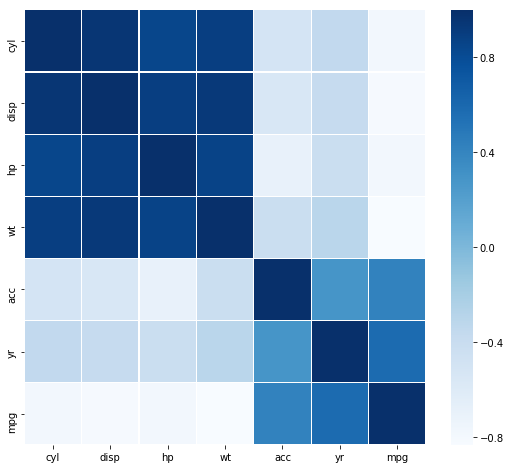

In [7]:
print("\033[94m\033[1mCorrelation Heatmap of the cars-dataset:\x1b[0m")
print("-"*40)
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(car_df.corr(), ax = ax, cmap ="Blues", linewidths = 0.1) 

2.Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

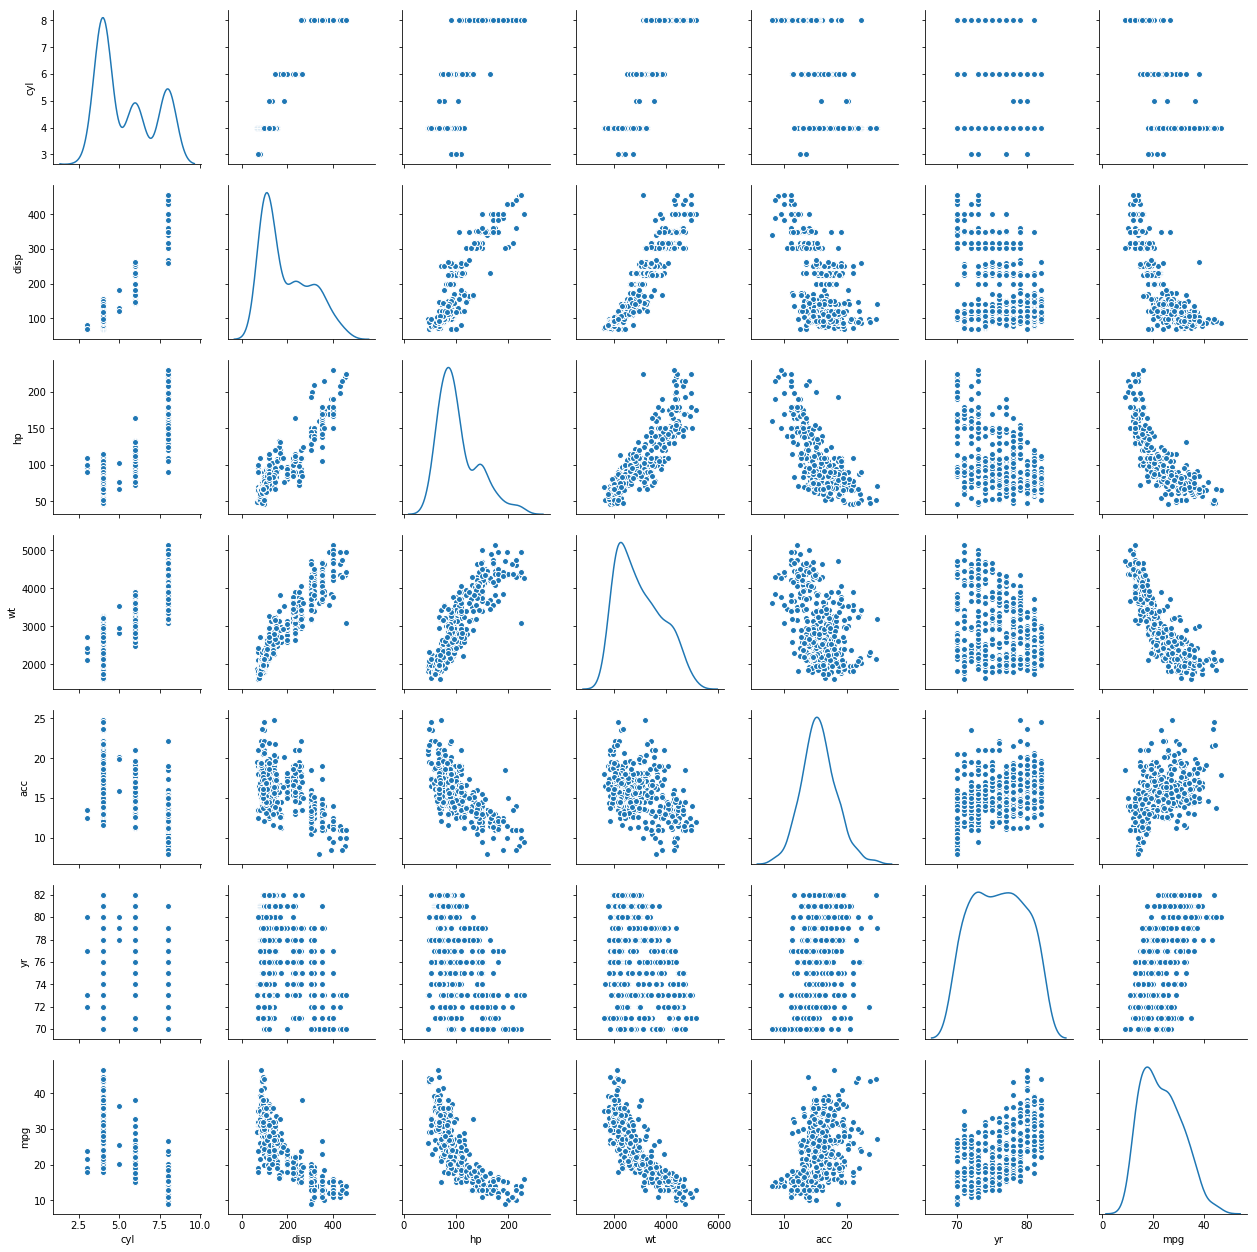

In [8]:
sns.pairplot(car_df, diag_kind='kde')

3.Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [11]:
car_df_num = car_df.loc[:, 'cyl':'mpg']
car_df_num_z = car_df_num.apply(zscore)

In [12]:
cluster_range = range( 2, 10)   
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_df_num_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,cluster_errors,num_clusters
0,1273.202187,2
1,928.617487,3
2,725.309400,4
3,656.614372,5
4,585.027353,6
5,533.533048,7
6,495.451026,8
7,448.347499,9


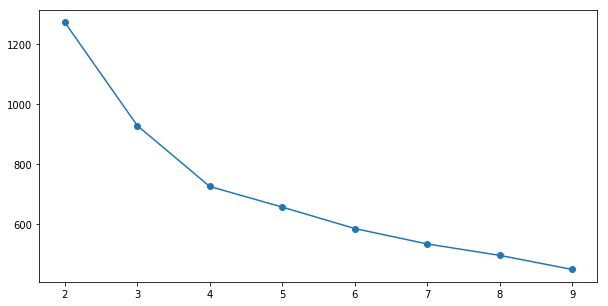

In [13]:
plt.figure(figsize=(10,5))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [14]:
#The elbow plot confirms that there are 3 clusters
cluster = KMeans( n_clusters = 3, random_state = 1 )
cluster.fit(car_df_num_z)
centroids = cluster.cluster_centers_
centroid_car_df = pd.DataFrame(centroids, columns = list(car_df_num_z) )
centroid_car_df

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.861108,-0.810982,-0.684304,-0.795149,0.363564,0.308306,0.763829
1,1.483947,1.485912,1.499293,1.387382,-1.065971,-0.666826,-1.151558
2,0.347040,0.238491,-0.044248,0.303356,0.292920,0.011269,-0.472584


In [15]:
Cluster_labels = cluster.predict(car_df_num_z)
car_df_num["Cluster_labels"] = Cluster_labels
car_df_num_z["Cluster_labels"] = Cluster_labels

In [16]:
print("\033[94m\033[1mCluster labels are:\x1b[0m",list(car_df_num["Cluster_labels"].unique()))

Cluster labels are: [1, 0, 2]


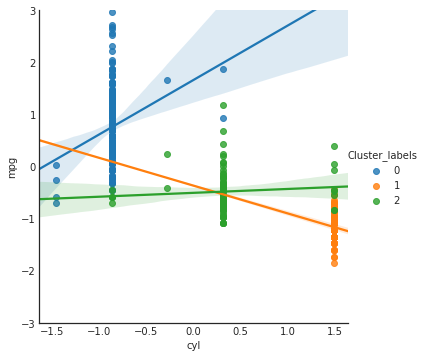

In [17]:
with sns.axes_style("white"):
    plot = sns.lmplot('cyl','mpg',data=car_df_num_z,hue="Cluster_labels")
plot.set(ylim = (-3,3))

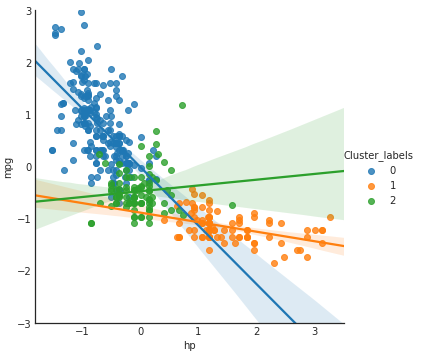

In [18]:
with sns.axes_style("white"):
    plot = sns.lmplot('hp','mpg',data=car_df_num_z,hue="Cluster_labels")
plot.set(ylim = (-3,3))

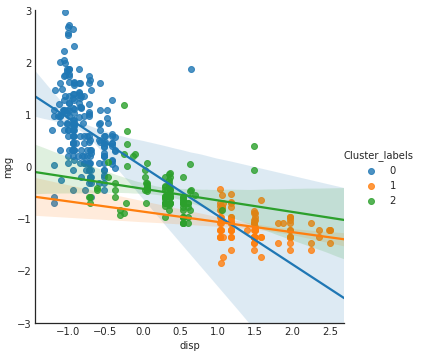

In [19]:
with sns.axes_style("white"):
    plot = sns.lmplot('disp','mpg',data=car_df_num_z,hue="Cluster_labels")
plot.set(ylim = (-3,3))

4.Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [20]:
car_df_num.head(1)

,cyl,disp,hp,wt,acc,yr,mpg,Cluster_labels
0,8,307.0,130,3504,12.0,70,18.0,1


In [35]:
X0 = car_df_num[car_df_num['Cluster_labels'] == 0].loc[:, 'cyl':'yr']
y0 = car_df_num[car_df_num['Cluster_labels'] == 0].loc[:, 'mpg']
X1 = car_df_num[car_df_num['Cluster_labels'] == 1].loc[:, 'cyl':'yr']
y1 = car_df_num[car_df_num['Cluster_labels'] == 1].loc[:, 'mpg']
X2 = car_df_num[car_df_num['Cluster_labels'] == 2].loc[:, 'cyl':'yr']
y2 = car_df_num[car_df_num['Cluster_labels'] == 2].loc[:, 'mpg']

In [45]:
print("\033[94m\033[1mCluster_labels = 0: Dependent variables dataset {X0} has:\x1b[0m",X0.shape, "Rows and Columns")
print("\033[94m\033[1mCluster_labels = 0: Independent variables dataset {y0} has :\x1b[0m",y0.shape , "Rows and Columns")
print("\033[94m\033[1mCluster_labels = 1: Dependent variables dataset {X1} has :\x1b[0m",X1.shape ,  "Rows and Columns")
print("\033[94m\033[1mCluster_labels = 1: Independent variables dataset {y1} has :\x1b[0m",y1.shape , "Rows and Columns")
print("\033[94m\033[1mCluster_labels = 2: Dependent variables dataset {X2} has :\x1b[0m",X2.shape , "Rows and Columns")
print("\033[94m\033[1mCluster_labels = 2: Independent variables dataset {y2} has :\x1b[0m",y2.shape , "Rows and Columns")

Cluster_labels = 0: Dependent variables dataset {X0} has: (202, 6) Rows and Columns
Cluster_labels = 0: Independent variables dataset {y0} has : (202,) Rows and Columns
Cluster_labels = 1: Dependent variables dataset {X1} has : (95, 6) Rows and Columns
Cluster_labels = 1: Independent variables dataset {y1} has : (95,) Rows and Columns
Cluster_labels = 2: Dependent variables dataset {X2} has : (95, 6) Rows and Columns
Cluster_labels = 2: Independent variables dataset {y2} has : (95,) Rows and Columns


In [134]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.30, random_state=1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=1)

In [138]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [153]:
linear_regression.fit(X0_train, y0_train)
print("\033[94m\033[1mLinear regression coefficients for the Cluster_labels = 0:\x1b[0m")
print("-"*60)
print("Dependent Varibles     |     Regression coefficients")
print("-"*60)
for x, var in enumerate(X0_train.columns):
    print("{}                            {}".format(var, round(linear_regression.coef_[x],4)))
print("Intercept                    ", round(linear_regression.intercept_,4))

Linear regression coefficients for the Cluster_labels = 0:
------------------------------------------------------------
Dependent Varibles     |     Regression coefficients
------------------------------------------------------------
cyl                            8.9065
disp                            -0.0695
hp                            -0.0582
wt                            -0.0046
acc                            0.0438
yr                            0.8816
Intercept                     -52.1913


In [154]:
linear_regression.fit(X1_train, y1_train)
print("\033[94m\033[1mLinear regression coefficients for the Cluster_labels = 1:\x1b[0m")
print("-"*60)
print("Dependent Varibles     |     Regression coefficients")
print("-"*60)
for x, var in enumerate(X1_train.columns):
    print("{}                            {}".format(var, round(linear_regression.coef_[x],4)))
print("Intercept                    ", round(linear_regression.intercept_,4))

Linear regression coefficients for the Cluster_labels = 1:
------------------------------------------------------------
Dependent Varibles     |     Regression coefficients
------------------------------------------------------------
cyl                            0.0
disp                            0.0021
hp                            -0.0323
wt                            -0.0015
acc                            -0.4333
yr                            0.347
Intercept                     5.4138


In [155]:
linear_regression.fit(X2_train, y2_train)
print("\033[94m\033[1mLinear regression coefficients for the Cluster_labels = 2:\x1b[0m")
print("-"*60)
print("Dependent Varibles     |     Regression coefficients")
print("-"*60)
for x, var in enumerate(X2_train.columns):
    print("{}                            {}".format(var, round(linear_regression.coef_[x],4)))
print("Intercept                    ", round(linear_regression.intercept_,4))

Linear regression coefficients for the Cluster_labels = 2:
------------------------------------------------------------
Dependent Varibles     |     Regression coefficients
------------------------------------------------------------
cyl                            0.774
disp                            -0.0087
hp                            -0.0296
wt                            -0.0041
acc                            -0.2609
yr                            0.5505
Intercept                     -4.3751
